<a href="https://colab.research.google.com/github/2303A52139/AIML_2303a52139/blob/main/AIML_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

AIML_LAB 10

Implement K-Means Clustering using Household Electricity Consumption Dataset.

<ipython-input-12-83318940cc59>:14: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[:, 0], X[:, 1], s=50, cmap='viridis')


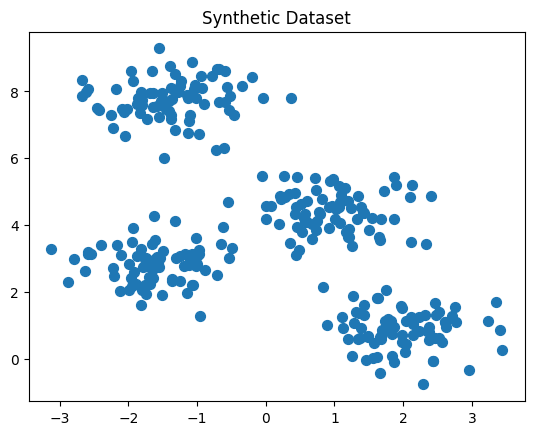

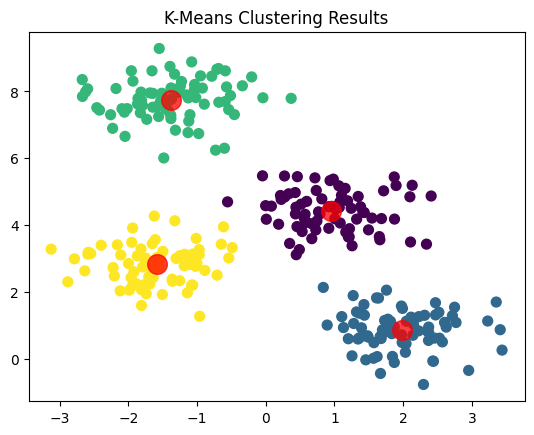

In [12]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin

X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)


plt.scatter(X[:, 0], X[:, 1], s=50, cmap='viridis')
plt.title("Synthetic Dataset")
plt.show()


kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)


plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75)
plt.title("K-Means Clustering Results")
plt.show()


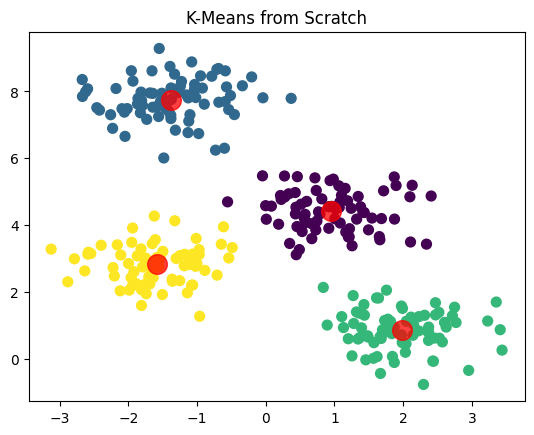

In [13]:
# Implement K-Means from scratch
def find_clusters(X, n_clusters, rseed=2):
    rng = np.random.RandomState(rseed)
    i = rng.permutation(X.shape[0])[:n_clusters]
    centers = X[i]
    while True:
        # Assign labels based on closest center
        labels = pairwise_distances_argmin(X, centers)
        # Compute new centers from the mean of points in each cluster
        new_centers = np.array([X[labels == i].mean(axis=0) for i in range(n_clusters)])
        # Check for convergence
        if np.all(centers == new_centers):
            break
        centers = new_centers
    return centers, labels

# Apply custom K-Means function
centers, labels = find_clusters(X, 4)

# Visualize the custom implementation results
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75)
plt.title("K-Means from Scratch")
plt.show()


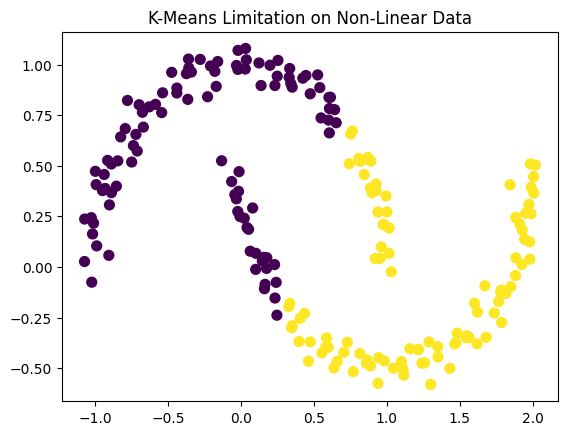

In [14]:
# Create a dataset with non-linear separable data (e.g., moons dataset)
from sklearn.datasets import make_moons
X_moons, y_moons = make_moons(200, noise=0.05, random_state=0)

# Fit KMeans to the data
kmeans_moons = KMeans(n_clusters=2, random_state=0)
labels_moons = kmeans_moons.fit_predict(X_moons)

# Visualize the limitation of K-Means
plt.scatter(X_moons[:, 0], X_moons[:, 1], c=labels_moons, s=50, cmap='viridis')
plt.title("K-Means Limitation on Non-Linear Data")
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


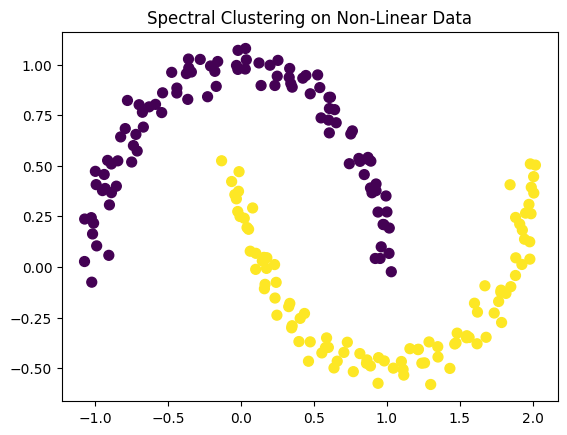

In [15]:
from sklearn.cluster import SpectralClustering

# Apply Spectral Clustering to handle non-linear boundaries
model = SpectralClustering(n_clusters=2, affinity='nearest_neighbors', assign_labels='kmeans')
labels_spectral = model.fit_predict(X_moons)

# Visualize the Spectral Clustering results
plt.scatter(X_moons[:, 0], X_moons[:, 1], c=labels_spectral, s=50, cmap='viridis')
plt.title("Spectral Clustering on Non-Linear Data")
plt.show()
